# Resolução do problema de condução de calor

In [195]:
import numpy as np
import matplotlib.pyplot as plt

In [196]:
# Função para plotar os curvas de nível constante de temperatura
def PlotaTemperature(n,m,T):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(T)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of temperature')
    im = ax.contourf(X, Y, Z.T, 20, cmap='jet')
    im2 = ax.contour(X, Y, Z.T, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()

## Método de Jacobi

np.linalg.norm = é uma função fornecida pela biblioteca NumPy que calcula a norma de um vetor ou a norma de uma matriz.

Tnew[1:N-1,1:N-1] = indica uma submatriz da matriz T, onde foi excluido as bordas inferios, superior, esquerda e direita que seria onde sabemos a temperatura

In [207]:
def met_Jacobi(N, tole):
    # Numero de pontos em cada direcao
    Told = np.zeros(shape=(N,N))
    
    # Temperaturas nas bordas
    Told[0,  :] = 0.0 # TL
    Told[N-1,:] = 0.0 # TR
    Told[:,  0] = 0.0 # TB
    Told[:,N-1] = 20.0 # TT
    #print(Told,"\n")
    # Loop de iteracoes
    Nmax = 10000
    Tnew = Told.copy()
    for iter in range(Nmax):
        Tnew[1:N-1,1:N-1] = 0.25*(Told[2:N,1:N-1] + Told[0:N-2,1:N-1] + \
                                Told[1:N-1,2:N] + Told[1:N-1,0:N-2])
        
        error = np.linalg.norm(Tnew-Told) 
       
        if(error < tole):
            print('Converged in %d iterations\n' %(iter))
            aux = iter
            break
    Told = Tnew.copy()       
    return iter
#PlotaTemperature(N,N,Tnew)

## Método de Gauss-Seidel

In [218]:
# Numero de pontos em cada direcao

def met_Seidel(N, tole):
    Told = np.zeros(shape=(N,N))
    vet_inter =[]
    # Temperaturas nas bordas
    Told[0,  :] = 0.0 # TL
    Told[N-1,:] = 0.0 # TR
    Told[:,  0] = 0.0 # TB
    Told[:,N-1] = 20.0 # TT
    #print(Told,'\n')
    # Loop de iteracoes
    Nmax = 10000
    Tnew = Told.copy()
    for iter in range(Nmax):
        for i in range(1,N-1):
            for j in range(1,N-1):
                Tnew[i,j] = 0.25*(Told[i+1,j] + Tnew[i-1,j] +\
                                Told[i,j+1] + Tnew[i,j-1])
        
        error = np.linalg.norm(Tnew-Told)
        if(error >tole):
            print(f'Seidel: Converged in {iter} iterations, {error}\n') 
            break
        
    Told = Tnew.copy() 
    return iter 
        

Exe. 01

In [219]:
valoresjacobi = []
valoresseidel =[]
n = [11,21, 41]
tol =[1.0e-5, 1.0e-8]

for k in tol:
    for i in n:
        valoresjacobi.append(met_Jacobi(i, k))
        valoresseidel.append(met_Seidel(i,k))
print((valoresjacobi))

TypeError: 'numpy.float64' object is not iterable

EXE 02


In [199]:
def met_interativo(x0, TOL, MAX_IT):
    k=0
    A = np.zeros(shape=(MAX_IT, MAX_IT))
    b = np.zeros(shape=(MAX_IT, 1))
    residuo = A. x0 - b
    while(residuo > TOL and k > MAX_IT):
        

SyntaxError: incomplete input (1314394434.py, line 7)

## Métodos com montagem explicíta da matriz

In [ ]:
# Função para converter indice (i,j) a indice global Ic
def ij2n (i, j, N):
    return i + j*N

# Função para montar a matriz do sistema
def MatAssembly(N):
    nunk = N**2
    A = np.zeros(shape=(nunk,nunk))
    for i in range(1,N-1):
        for j in range(1,N-1): 
            Ic = ij2n(i,   j,   N)
            Ie = ij2n(i+1, j,   N)
            Iw = ij2n(i-1, j,   N)
            In = ij2n(i,   j+1, N)
            Is = ij2n(i,   j-1, N)
            A[Ic,[Ic,Ie,Iw,In,Is]] = [4.0, -1.0, -1.0, -1.0, -1.0] # dos indices que recebera os valores passados]
    return A

A = MatAssembly(4)
print(A, '\n')

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

## Temperaturas nas borda

In [ ]:
# Função para modificar a matriz e incorporar as condições de borda
def BuildSystem(A, N, TL, TR, TB, TT):
    nunk = N**2
    A = MatAssembly(N)# matriz com os indices globais
    Atilde = A.copy()
    b = np.zeros(shape=(nunk,1)) #vetor coluna b, com dimensão N**2
    
    k = np.array(range(0,N)) #vetor linha k com dimensão N
 
    Iden = np.identity(nunk) #matriz identidade 

    Ic = ij2n(0,k,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TL # Tleft

    Ic = ij2n(N-1,k,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TR # Tright

    Ic = ij2n(k,0,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TB # Tbottom

    Ic = ij2n(k,N-1,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TT # Ttop
    
    return Atilde, b

N = 41
Atilde, b = BuildSystem(A, N, TL=0.0, TR=0.0, TB=0.0, TT=20.0)
print(Atilde,'\n', b)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]] 
 [[ 0.]
 [ 0.]
 [ 0.]
 ...
 [20.]
 [20.]
 [20.]]


## Condições de borda mantendo a simetria

0.0


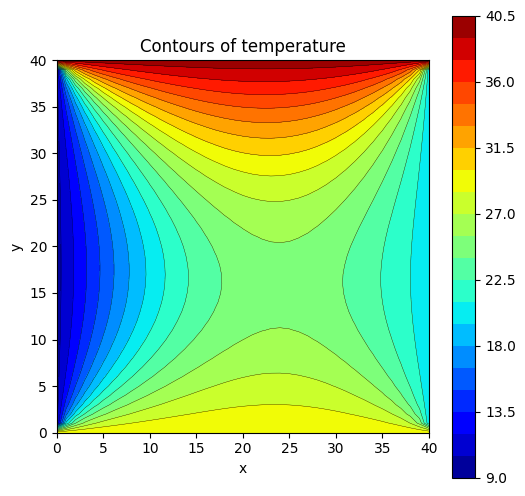

In [ ]:
# Função para modificar a matriz e incorporar as condições de borda
def BuildSystemSim(N, TL, TR, TB, TT):
    nunk = N**2
    A = MatAssembly(N)
    Atilde = A.copy()
    b = np.zeros(shape=(nunk))
    k = np.array(range(0,N))
    Iden = np.identity(nunk)

    Ic = ij2n(0,k,N) # Tleft
    for r in k:
        b[:] = b[:] - A[:,Ic[r]]*TL 
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TL
    Atilde[:,Ic] = Iden[:,Ic]

    # completar aqui
    Ic = ij2n(N-1,k,N) #tright
    for r in k:
        b[:] = b[:] - A[:,Ic[r]]*TR 
    Atilde[Ic,:], b[Ic] = Iden[Ic,:],TR
    Atilde[:,Ic] = Iden[:,Ic] 


    Ic = ij2n(k,0,N) #TBottom
    for r in k:
        b[:] = b[:] -A[:, Ic[r]]*TB
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TB 
    Atilde[:,Ic] = Iden[:,Ic]

    Ic = ij2n(k,N-1,N) #TTop
    for r in k:
        b[:] = b[:] -A[:, Ic[r]]*TT
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TT # Ttop
    Atilde[:,Ic] = Iden[:,Ic]
    
    #0xsol_cg, info = scipy.linalg.cg(Atilde, b, tol=1e-8, M=P, callback=cg_counter())
    # Compĺetar o codigo para o resto das paredes
    #while(r > TOL and k < MAX_It):

    #.
    #.
    #.
    
    return Atilde, b

N = 41
Atilde, b = BuildSystemSim(N, TL=10.0, TR=20.0, TB=30.0, TT=40.0)
print(np.linalg.norm(Atilde-Atilde.T))

import scipy
from scipy.linalg import solve


T = scipy.linalg.solve(Atilde,b)
Tplot = T.copy().reshape(N,N).T
PlotaTemperature(N,N,Tplot)

## Resolvendo com métodos iterativos avançados

In [ ]:
import scipy
from scipy.sparse import linalg
from scipy.sparse import csc_matrix
import time

class gmres_counter(object):
    def __init__(self, disp=True):
        self._disp = disp
        self.niter = 0
    def __call__(self, rk=None):
        self.niter += 1
        if self._disp:
            print('iter %3i\trk = %s' % (self.niter, str(rk)))
            
import inspect
class cg_counter(object):
    def __init__(self, disp=True):
        self._disp = disp
        self.niter = 0
    def __call__(self, rk=None):
        self.niter += 1
        frame = inspect.currentframe().f_back
        if self._disp:
            print('iter %3i\trk = %f' % (self.niter, frame.f_locals['resid']))

# Armar um caso de grande porte: Matriz densa   
N = 81
start_time = time.time()
Atilde, b = BuildSystemSim(N, TL=10.0, TR=20.0, TB=30.0, TT=40.0)
print("---Assembly: %s seconds ---" % (time.time() - start_time))


Atildesp = csc_matrix(Atilde)

# Examples of direct method (escalonamento)
print('\nMétodo direto\n')
start_time = time.time()
xsol_dir = scipy.sparse.linalg.spsolve(Atildesp,b)
print("---Tempo método Direto: %s seconds ---" % (time.time() - start_time))
            
# Example of conjugate gradient
print('\nMétodo iterativo CG')
start_time = time.time()
xsol_cg, info = scipy.sparse.linalg.cg(Atildesp, b, tol=1e-5, callback= cg_counter())
print("---Tempo método cg: %s seconds ---" % (time.time() - start_time))

# Example of Generalized minimum residual
print('\nMétodo iterativo GMRES')
start_time = time.time()
xsol_gmres, info = scipy.sparse.linalg.gmres(Atildesp, b, tol=1e-5, callback=gmres_counter())
print("---Tempo método gmres: %s seconds ---" % (time.time() - start_time))

TypeError: BuildSystemSim() missing 2 required positional arguments: 'TOL' and 'MAX_It'